<a href="https://colab.research.google.com/github/The237/DeepLearningCourses/blob/main/01_06_Regression_Lineaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header = None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data = data
target = target

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data.shape

(506, 13)

In [ ]:
target.shape

(506,)

In [6]:
X = data

In [7]:
y = target.reshape((len(data),1))

# Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)

In [ ]:
X_train.shape

(379, 13)

In [ ]:
X_test.shape

(127, 13)

# Standard scaler

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrainement du modèle

In [10]:
# define a loss function based on mean squared
def erreur(X, Y, params):
  info = {}
  M = np.dot(X,params["W"])

  P = M+params["B"]

  L = np.mean((Y-P)**2)

  info["M"] = M
  info["P"] = P
  info["X"] = X
  info["Y"] = Y

  return L, info

In [11]:
def gradient(info, params):
  grads = {}

  dL_dP = -2*(info["Y"] - info["P"]) # shape (4,1)

  dP_dM = 1

  dM_dW = info["X"].T # shape (3,4)

  dL_dW = np.dot(dM_dW,dL_dP) * dP_dM

  grads["W"] = dL_dW

  dP_dB = 1
  dL_dB = dL_dP * dP_dB # shape (4,1) *1

  grads["B"] = np.sum(dL_dB)

  return grads

In [12]:
def train(X, Y, epoch, lr):
  # weights initialization
  np.random.seed(42)
  n_features = X.shape[1]
  params = {}
  params["W"] = np.random.randn(n_features,1)
  params["B"] = np.random.randn(1,1)

  errors = []
  for i in range(epoch):

    # forward
    loss , info = erreur(X,Y, params)
    errors.append(loss)
    print(f'Epoch {i+1} ............. loss : {loss}')

    # backward
    grads = gradient(info, params)

    # update
    for p in params:
      params[p] -= lr*grads[p]

  return params, errors

In [13]:
params, errors = train(X_train, y_train, epoch = 50, lr = .0001)

Epoch 1 ............. loss : 712.1743316753176
Epoch 2 ............. loss : 576.9266828543414
Epoch 3 ............. loss : 485.858491899185
Epoch 4 ............. loss : 415.2086742559719
Epoch 5 ............. loss : 356.9632229723388
Epoch 6 ............. loss : 307.84342137397
Epoch 7 ............. loss : 266.08549083943615
Epoch 8 ............. loss : 230.48512859031536
Epoch 9 ............. loss : 200.10246942244535
Epoch 10 ............. loss : 174.16135658526716
Epoch 11 ............. loss : 152.00725038460388
Epoch 12 ............. loss : 133.0840641810185
Epoch 13 ............. loss : 116.91811788815627
Epoch 14 ............. loss : 103.1055392228527
Epoch 15 ............. loss : 91.30184176600252
Epoch 16 ............. loss : 81.21313594214138
Epoch 17 ............. loss : 72.58866623374146
Epoch 18 ............. loss : 65.21445904094307
Epoch 19 ............. loss : 58.90791093686188
Epoch 20 ............. loss : 53.51317628743457
Epoch 21 ............. loss : 48.8972353342667

In [14]:
import matplotlib.pyplot as plt

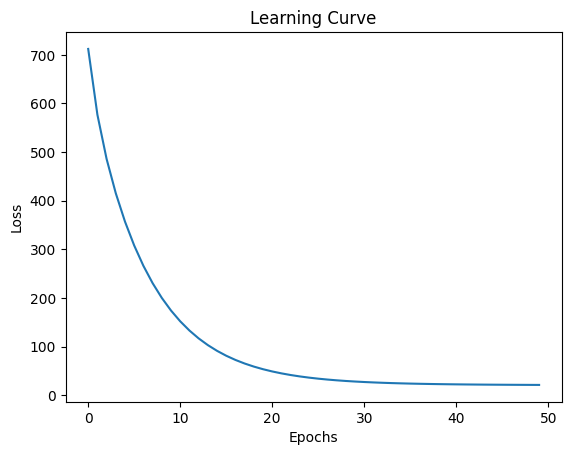

In [15]:
plt.plot(list(range(len(errors))), errors)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.show()

# Evaluation sur des données de test

In [16]:
def predict(X, params):
  M = np.dot(X, params["W"])

  P = M + params["B"]

  return P

In [21]:
# mean squared error and root mean squared error
def mse(y, pred):
  return np.mean((y - pred)**2)

def rmse(y, pred):
  return np.sqrt(np.mean((y - pred)**2))

def mae(y, pred):
  return np.mean(np.abs(y-pred))

In [22]:
predictions = predict(X_test, params)
score_rmse = rmse(y_test, predictions)
score_mae = mae(y_test, predictions)

print(f'RMSE : : {score_rmse} and MAE : {score_mae}')

RMSE : : 5.789353683592818 and MAE : 3.767565256108071


In [23]:
params

{'W': array([[-0.61301264],
        [ 0.3831569 ],
        [-0.33512567],
        [ 0.75907099],
        [-0.99290619],
        [ 3.1112321 ],
        [ 0.24618677],
        [-1.28640179],
        [ 0.15130188],
        [-0.18963709],
        [-2.1719948 ],
        [ 0.74003657],
        [-3.34785879]]),
 'B': array([[22.13243641]])}

Comparaison avec Sklearn

In [25]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions_sklearn = model.predict(X_test)
score_rmse_sl = rmse(y_test, predictions_sklearn)
score_mae_sl = mae(y_test, predictions_sklearn)
print(f'RMSE : {score_rmse_sl} and MAE : {score_mae_sl}')

RMSE : 5.4573111595640516 and MAE : 3.6683301481357136
